# Insurance Cost Prediction Project

This notebook predicts insurance costs using regression models. The workflow includes:

1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Modeling (Linear Regression, Random Forest, XGBoost, SVR)
5. Model Evaluation
6. Interpretation & Insights

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Data Loading

Load the insurance dataset and inspect its structure.

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


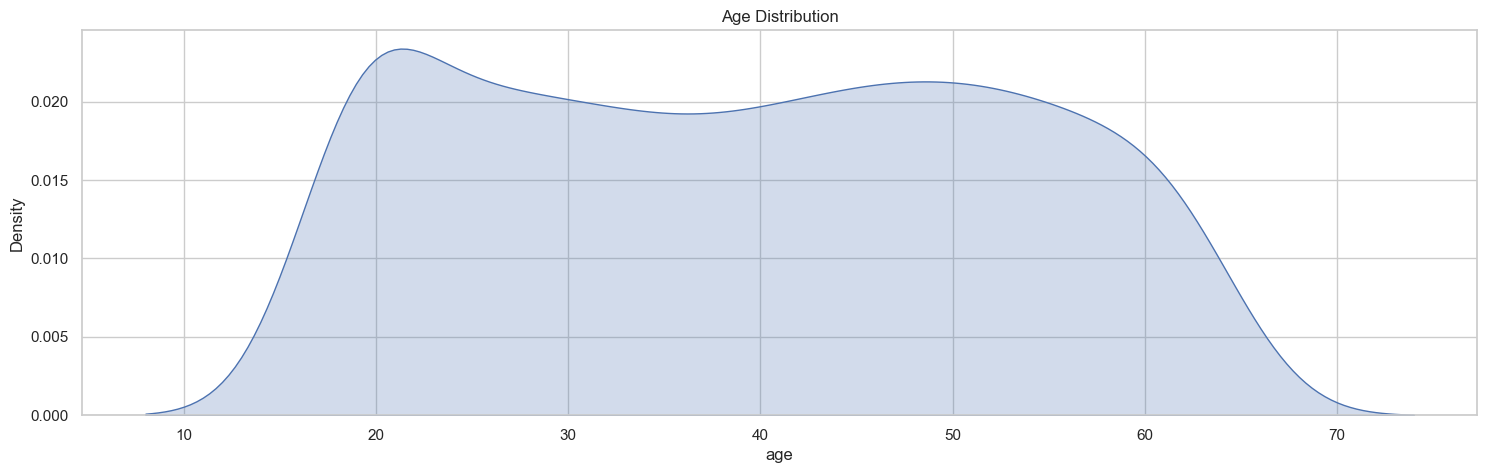

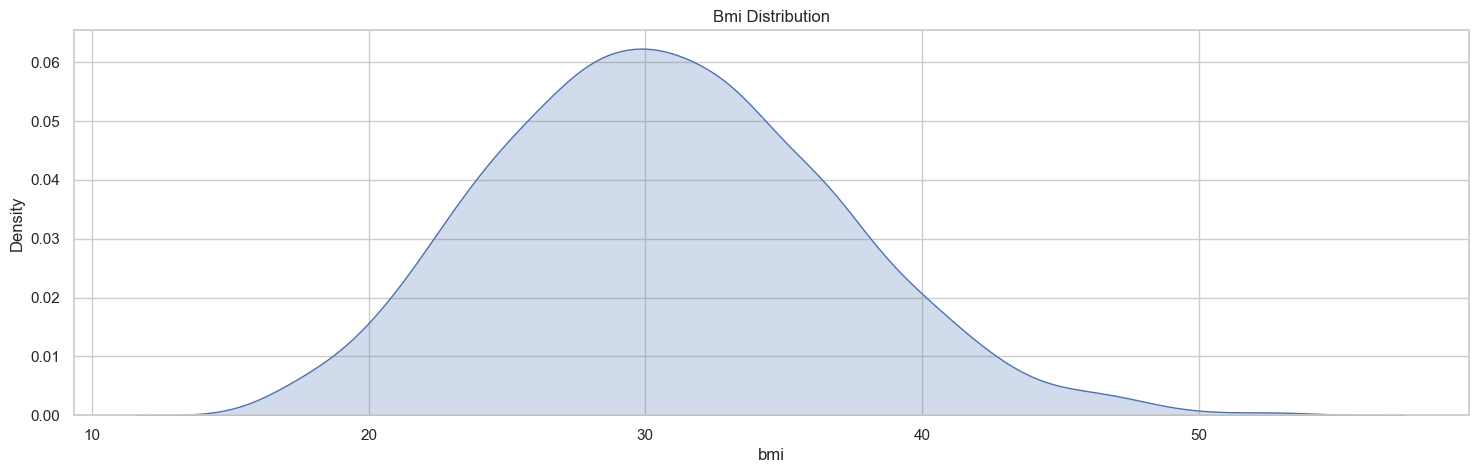

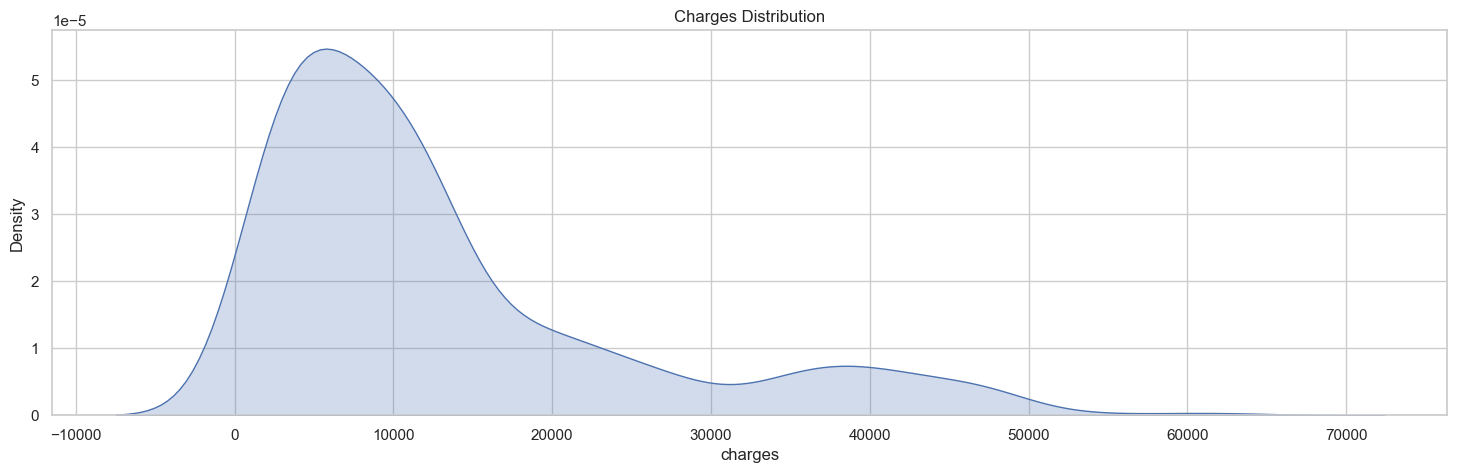

In [14]:
for col in ['age', 'bmi', 'charges']:
    plt.figure(figsize=(18,5))
    sns.kdeplot(data=df,x=col, fill=True)
    plt.title(f'{col.capitalize()} Distribution')
    plt.show()


Plotting the distribution of the target variable 'charges' after applying natural log transformation

<Axes: xlabel='charges', ylabel='Density'>

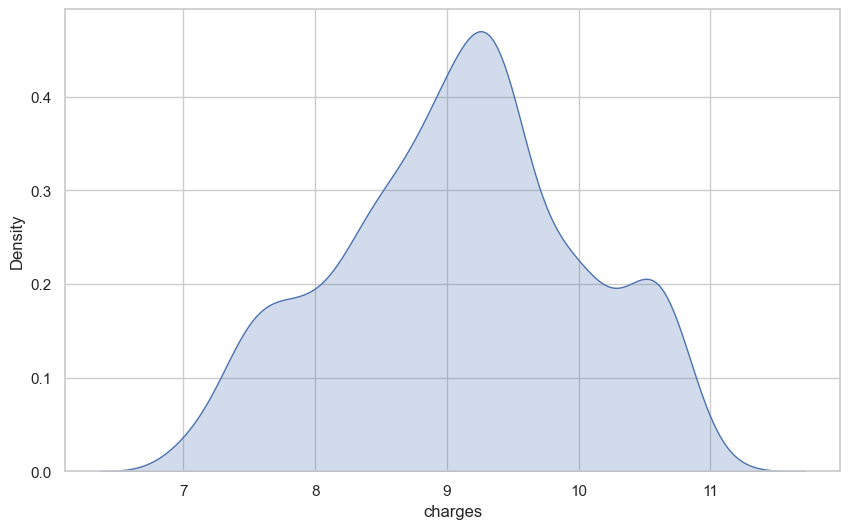

In [15]:
sns.kdeplot(data=df,x=np.log(df["charges"]), fill=True)

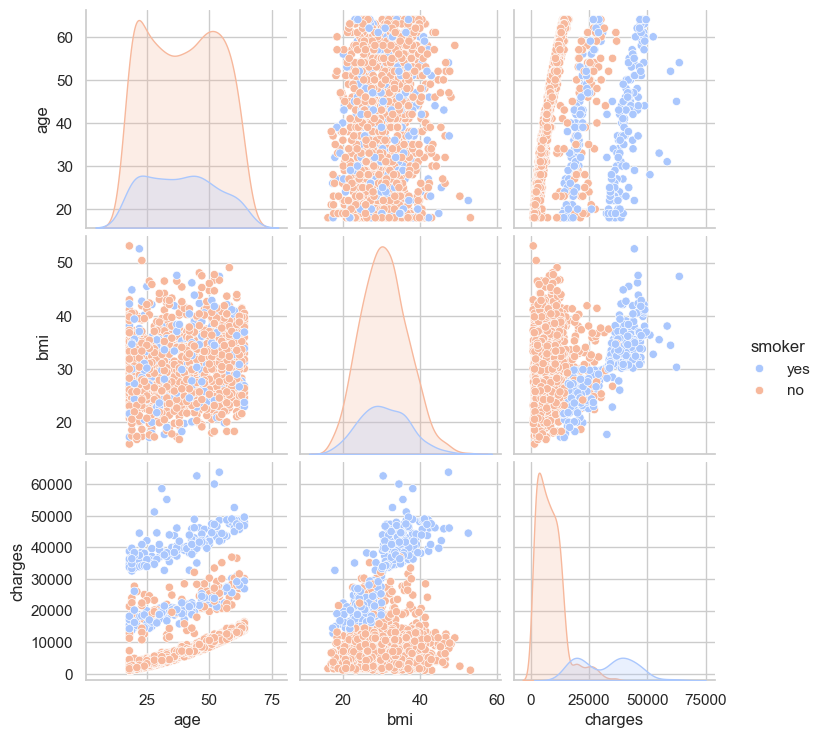

In [16]:
sns.pairplot(df, hue='smoker', vars=['age', 'bmi', 'charges'], palette='coolwarm')

<Axes: xlabel='sex', ylabel='charges'>

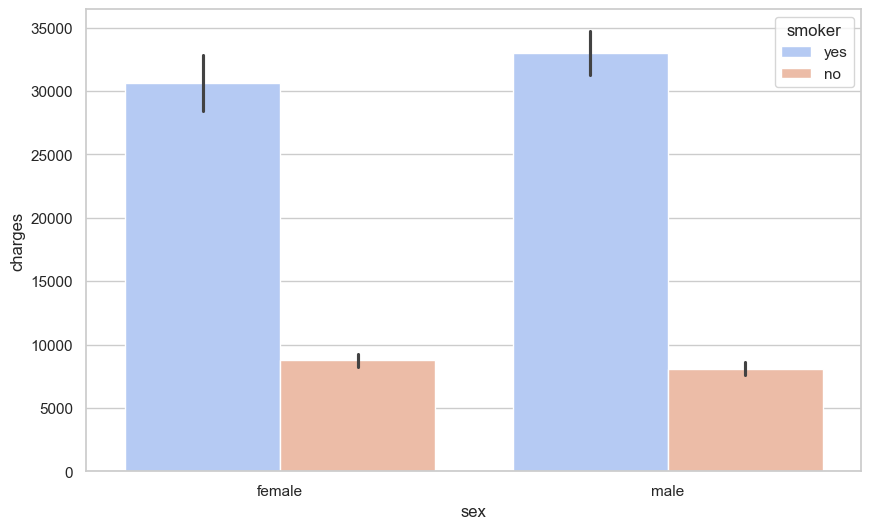

In [17]:
sns.barplot(data=df,x="sex", y="charges",hue="smoker", palette="coolwarm")


The barplot shows that, for both males and females, smokers have much higher average insurance charges compared to non-smokers. The difference in charges between smokers and non-smokers is very large, while the difference between males and females within the same smoking status is small. This indicates that smoking status has a much greater impact on insurance charges than sex.

C:\Users\bstku\AppData\Local\Temp\ipykernel_12176\4051921889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, y="charges", kind="box", palette="coolwarm")


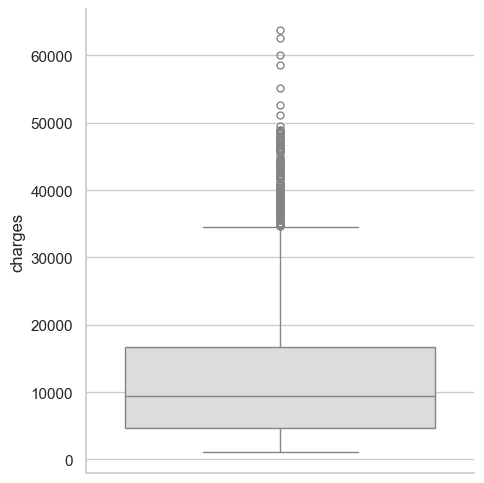

In [18]:
sns.catplot(data=df, y="charges", kind="box", palette="coolwarm")


The boxplot shows that most insurance charges are concentrated below 20,000, with a median around 9,000. There are many high-value outliers above the upper whisker, indicating that a small number of individuals have much higher charges than the majority. The distribution is right-skewed, with a long tail of higher charges.

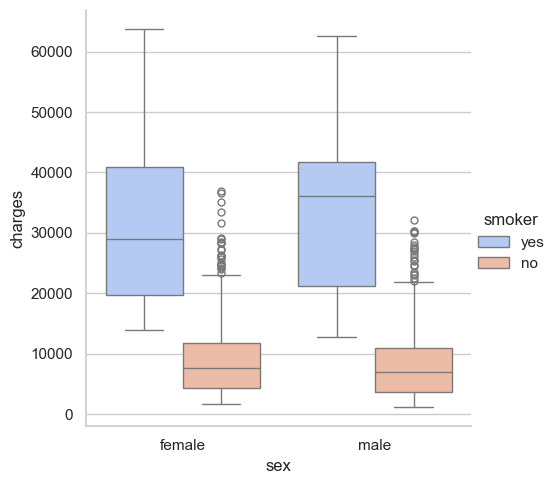

In [19]:
sns.catplot(data=df, x="sex", y="charges",kind="box",hue="smoker", palette="coolwarm")

From the boxplot, we can observe that smokers, regardless of sex, have significantly higher insurance charges compared to non-smokers. Among both males and females, the median and spread of charges are much greater for smokers. There is no substantial difference in charges between males and females within the same smoking status, but the impact of smoking on charges is very pronounced. Additionally, there are more outliers among non-smokers, but their charges remain much lower than those of smokers.

C:\Users\bstku\AppData\Local\Temp\ipykernel_12176\2053864611.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df,x='region',y='charges',kind='box',palette='coolwarm')


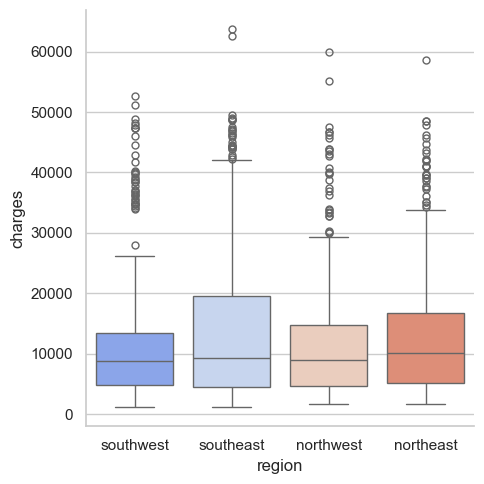

In [20]:
sns.catplot(data=df,x='region',y='charges',kind='box',palette='coolwarm')


 insurance charges vary across different regions, but the differences are not very large. The southeast region has a slightly higher median and a wider spread of charges compared to the other regions. All regions have a number of high-value outliers, indicating that some individuals in every region incur much higher charges than the majority. Overall, region does not appear to have a strong impact on insurance charges.

<Axes: >

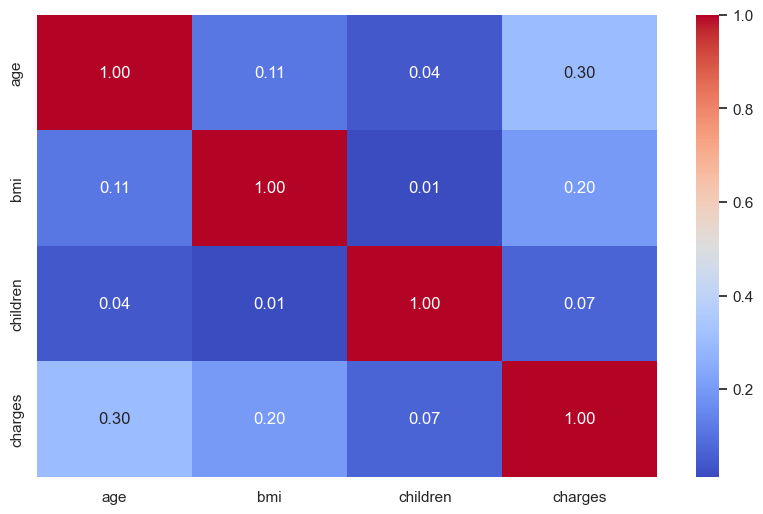

In [21]:
corr = df[['age','bmi','children','charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

Thier no correlation among valiables.

In [22]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [23]:
df[['sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']] = df[['sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']].astype(int)

The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.

In [24]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [25]:
df['charges'] = np.log(df['charges'])

In [26]:
X = df.drop(columns=['charges'])
y = df['charges']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
import statsmodels.api as sm


In [29]:

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     396.7
Date:                Sun, 17 Aug 2025   Prob (F-statistic):          1.83e-312
Time:                        23:35:19   Log-Likelihood:                -671.72
No. Observations:                1069   AIC:                             1361.
Df Residuals:                    1060   BIC:                             1406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0520      0.083  



### Model Performance

- **R-squared:** 0.750  
  The model explains 75% of variance in log(charges).
- **Adjusted R-squared:** 0.748  
  Good fit even after adjusting for number of predictors.
- **F-statistic:** 396.7 (p-value < 0.001)  
  Model is highly significant overall.

### Significant Predictors (p < 0.05)

#### Strongest Effects

- **smoker_yes (coef = 1.5375):**  
  Being a smoker increases log(charges) by ~1.54 units, making it the most impactful factor.
- **age (coef = 0.0340):**  
  Each additional year increases log(charges) by 0.034 units.
- **children (coef = 0.0992):**  
  Each additional child increases log(charges) by ~0.10 units.
- **bmi (coef = 0.0131):**  
  Each BMI unit increase raises log(charges) by 0.013 units.

### Regional Effects

- **region_southeast (coef = -0.1286):**  
  Southeast region pays ~12.9% less than northeast (reference).
- **region_southwest (coef = -0.1013):**  
  Southwest region pays ~10.1% less than northeast.

### Gender Effect

- **sex_male (coef = -0.0768):**  
  Males pay ~7.7% less than females.

## Non-Significant Predictor

- **region_northwest (p = 0.277):**  
  No significant difference from northeast region.

### Key Business Insights

1. **Smoking dominates:** Smokers pay approximately 4.6x more than non-smokers (e^1.5375).
2. **Age matters:** Older individuals consistently pay more.
3. **Regional variations exist:** Northeast is the most expensive region.
4. **Gender gap:** Males pay slightly less than females.
5. **Family size impact:** More children lead to higher premiums.

### Model Diagnostics

- **Durbin-Watson:** 1.874  
  No serious autocorrelation issues.
- Strong model fit with most assumptions likely met based on your residual

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
# Predict on test set
y_test_pred_sm = model_sm.predict(X_test_sm)
y_train_pred_sm = model_sm.predict(X_train_sm)

# Evaluate (same as before)
print(" Statsmodels OLS Results")
print(f"R²:   {r2_score(y_test, y_test_pred_sm):.4f}")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_sm):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_sm)):.4f}")

 Statsmodels OLS Results
R²:   0.8295
MAE:  0.2607
RMSE: 0.3979


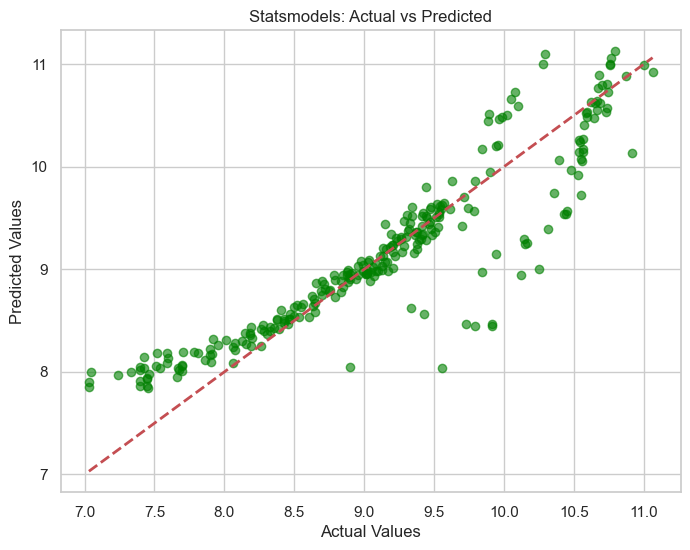

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_sm, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Statsmodels: Actual vs Predicted')
plt.grid(True)
plt.show()


In [37]:
#  Most useful attributes from the fitted model:
print("\\n Useful Info from model_sm:")

# Coefficients
print("Intercept + Coefficients:")
print(model_sm.params)

# P-values (check significance)
print("\\nP-values (look for < 0.05):")
p_values = model_sm.pvalues
print(p_values)

# Confidence intervals
print("\\n95% Confidence Intervals:")
print(model_sm.conf_int())

# Adjusted R-squared
print(f"\\nAdjusted R²: {model_sm.rsquared_adj:.4f}")

# Residuals
residuals = model_sm.resid

\n🔍 Useful Info from model_sm:
Intercept + Coefficients:
const               7.052009
age                 0.033997
bmi                 0.013150
children            0.099169
sex_male           -0.076797
smoker_yes          1.537508
region_northwest   -0.043657
region_southeast   -0.128597
region_southwest   -0.101252
dtype: float64
\nP-values (look for < 0.05):
const                0.000000e+00
age                 3.993609e-170
bmi                  7.484348e-08
children             7.510473e-17
sex_male             6.249531e-03
smoker_yes          8.726500e-240
region_northwest     2.768707e-01
region_southeast     1.638516e-03
region_southwest     1.200422e-02
dtype: float64
\n95% Confidence Intervals:
                         0         1
const             6.888928  7.215091
age               0.032020  0.035974
bmi               0.008387  0.017913
children          0.076220  0.122117
sex_male         -0.131797 -0.021798
smoker_yes        1.468569  1.606447
region_northwest -0.122398  0

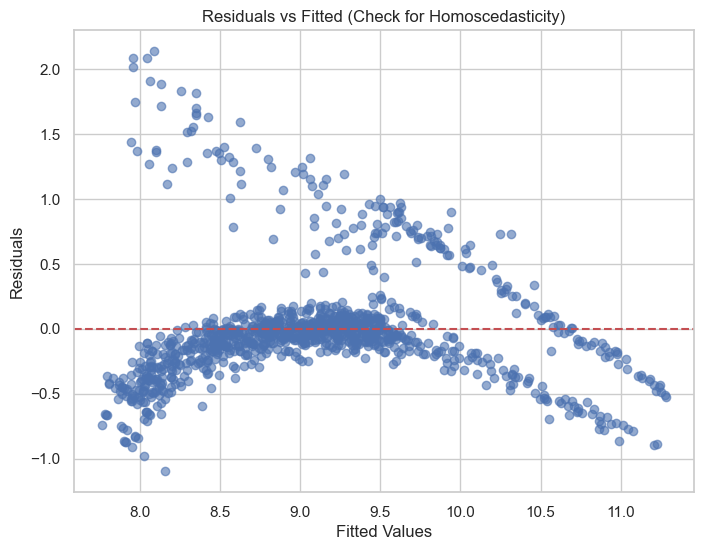

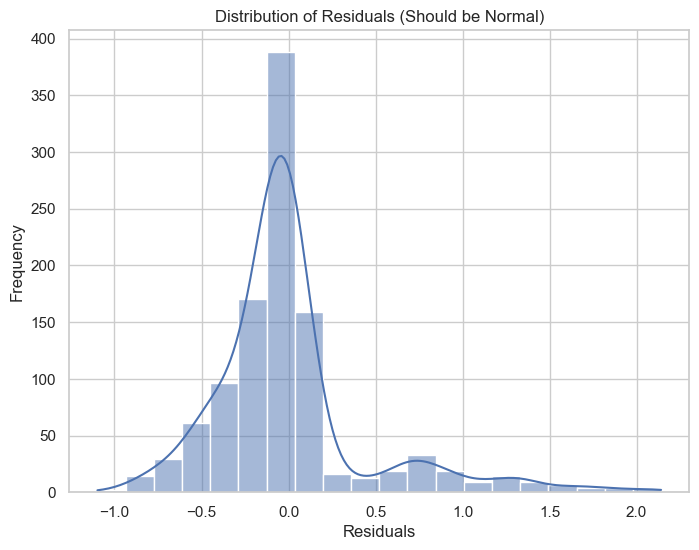

In [38]:
# Residuals vs Fitted (Check for patterns)
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred_sm, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Check for Homoscedasticity)')
plt.grid(True)
plt.show()

# Histogram of residuals (Check normality)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Residuals (Should be Normal)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()